In [1]:
# Bruno Ugolini

# Notes:

You are banned from using loops (`for` or `while` or any other) for this entire workshop!

You shouldn't be using loops almost ever with pandas in any case, so break out of the habit now.

## 1. DataFrame basics


Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

**2.** Select only the rows where visits are 3 or more. Which types of animals are these?

**3.** Select the rows where visists are 3 and the animal is a cat

**4.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

**5.** Calculate the mean age for each different animal in `df`.

**6.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.



In [2]:
# 1. Create a DataFrame df from this dictionary data which has the index labels.
import numpy as np
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

import pandas as pd

df = pd.DataFrame(data, index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [3]:
# 2. Select only the rows where visits are 3 or more. Which types of animals are these?
df.loc[df.visits >= 3].animal

b    cat
d    dog
f    cat
Name: animal, dtype: object

In [4]:
# 3. Select the rows where visists are 3 and the animal is a cat
df.loc[(df.visits == 3) & (df.animal == 'cat')]

,animal,age,visits,priority
b,cat,3.0,3,yes
f,cat,2.0,3,no


In [5]:
# 4. Calculate the sum of all visits in df (i.e. the total number of visits).
sum(df.visits)

19

In [6]:
# 5. Calculate the mean age for each different animal in df.
df.groupby(by='animal', ).mean().age

animal
cat      2.5
dog      5.0
snake    2.5
Name: age, dtype: float64

In [7]:
# 6. Append a new row 'k' to df with your choice of values for each column. 
#    Then delete that row to return the original DataFrame.

df['k'] = np.random.randint(1, 100, size=len(df))
print(f"Modified dataframe:\n {df}\n")
df = df.drop(axis=1, columns=['k'])
print(f"Retrieved dataframe:\n {df}\n")

Modified dataframe:
   animal  age  visits priority   k
a    cat  2.5       1      yes  52
b    cat  3.0       3      yes   5
c  snake  0.5       2       no  59
d    dog  NaN       3      yes  16
e    dog  5.0       2       no  31
f    cat  2.0       3       no  66
g  snake  4.5       1       no  83
h    cat  NaN       1      yes  23
i    dog  7.0       2       no   1
j    dog  3.0       1       no  92

Retrieved dataframe:
   animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no



# 2.1 Shifty problem

You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

You should be left with a column containing the following values:

```python
1, 2, 3, 4, 5, 6, 7
```

### Hint: use the `shift()` method

In [9]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df = df.loc[(df.values != df.shift(-1).values)]
df

,A
0,1
2,2
3,3
4,4
7,5
8,6
10,7


# 2.2 columns sum min

Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum? Return that column's label.

In [10]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
df

,a,b,c,d,e,f,g,h,i,j
0,0.828587,0.242942,0.736023,0.701946,0.374808,0.184590,0.936289,0.944918,0.475904,0.303827
1,0.602599,0.175637,0.136118,0.667233,0.247581,0.846010,0.858480,0.403255,0.103415,0.742133
2,0.341336,0.401331,0.705690,0.635393,0.499165,0.234225,0.142697,0.633486,0.978783,0.074464
3,0.564130,0.830626,0.685529,0.469494,0.471063,0.244428,0.705635,0.025416,0.619467,0.459847
4,0.547200,0.618666,0.427588,0.256103,0.994622,0.866747,0.281364,0.291785,0.203615,0.395077


In [11]:
df.columns[np.argmin(df.sum())]

'j'

# 2.3 Duplicates

How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

**hint:** There's a method for to find duplicate rows for you

In [12]:
df = pd.DataFrame(data=[[0,1,2],[4,5,6],[7,8,9],[1,2,3],[4,5,6]],columns=['a', 'b', 'c'])
df

,a,b,c
0,0,1,2
1,4,5,6
2,7,8,9
3,1,2,3
4,4,5,6


In [13]:
print(f"The number of duplicated rows is: {sum(df.duplicated())}")
print(f"The number of unique rows is: {len(df)-sum(df.duplicated())}")

The number of duplicated rows is: 1
The number of unique rows is: 4


# 2.4 Group Values

A DataFrame has a column of groups 'grps' and and column of integer values 'vals': 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values.  You should end up with the answer as follows:
```
grps
a    409
b    156
c    345
```

In [14]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
df.groupby(by='grps')['vals'].apply(lambda grp: grp.nlargest(3).sum())

grps
a    409
b    156
c    345
Name: vals, dtype: int64

# 3. Cleaning Data

### Making a DataFrame easier to work with

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```

Formatted, it looks like this:

```
            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM(!)
1      MAdrid_miLAN           NaN            []    <Air France> (12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis           NaN          [13]       12. Air France
4   Brussels_londOn       10085.0      [67, 32]          "Swiss Air"
```

**1.** Some values in the the **FlightNumber** column are missing (they are `NaN`). These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Modify `df` to fill in these missing numbers and make the column an integer column (instead of a float column).

In [15]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [16]:
df = df.interpolate()
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055.0,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075.0,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


# 3.2 column splitting

The **From\_To** column would be better as two separate columns! Split each string on the underscore delimiter `_` to make two new columns `From` and `To` to your dataframe.

In [17]:
df[['From', 'To']] = df['From_To'].str.split('_', 1, expand=True)
df = df.drop('From_To',axis=1)
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045.0,"[23, 47]",KLM(!),LoNDon,paris
1,10055.0,[],<Air France> (12),MAdrid,miLAN
2,10065.0,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,10075.0,[13],12. Air France,Budapest,PaRis
4,10085.0,"[67, 32]","""Swiss Air""",Brussels,londOn


# 3.3 Clean Text

Make the text in your dataframe:

- From and To columns should be lowercase with only first letter capitalized

- In the **Airline** column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [18]:
df['From'] = df['From'].str.capitalize()
df['To'] = df['To'].str.capitalize()
df['Airline'] = df['Airline'].str.replace('[\s0-9.()<>!"]','')
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045.0,"[23, 47]",KLM,London,Paris
1,10055.0,[],AirFrance,Madrid,Milan
2,10065.0,"[24, 43, 87]",BritishAirways,London,Stockholm
3,10075.0,[13],AirFrance,Budapest,Paris
4,10085.0,"[67, 32]",SwissAir,Brussels,London


# Exercise 4.1: Column Splitting

Given the unemployment data in `data/country_total.csv`, split the `month` column into two new columns: a `year` column and a `month` column, both integers

In [19]:
df = pd.read_csv('data/country_total.csv')
df['year'] = np.int32(df['month'] // 1)
df

,country,seasonality,month,unemployment,unemployment_rate,year
0,at,nsa,1993.01,171000,4.5,1993
1,at,nsa,1993.02,175000,4.6,1993
2,at,nsa,1993.03,166000,4.4,1993
3,at,nsa,1993.04,157000,4.1,1993
4,at,nsa,1993.05,147000,3.9,1993
...,...,...,...,...,...,...
20791,uk,trend,2010.06,2429000,7.7,2010
20792,uk,trend,2010.07,2422000,7.7,2010
20793,uk,trend,2010.08,2429000,7.7,2010
20794,uk,trend,2010.09,2447000,7.8,2010


In [20]:
df['month'] = np.int32(np.round((df.month - df.year)*100,0))
df

,country,seasonality,month,unemployment,unemployment_rate,year
0,at,nsa,1,171000,4.5,1993
1,at,nsa,2,175000,4.6,1993
2,at,nsa,3,166000,4.4,1993
3,at,nsa,4,157000,4.1,1993
4,at,nsa,5,147000,3.9,1993
...,...,...,...,...,...,...
20791,uk,trend,6,2429000,7.7,2010
20792,uk,trend,7,2422000,7.7,2010
20793,uk,trend,8,2429000,7.7,2010
20794,uk,trend,9,2447000,7.8,2010


# 4.2 Group Statistics

Given the unemployment data in `data/country_sex_age.csv`, give the average unemployment rate for:

- Each gender
- Each Age Group
- Both Together

**HINT:** The `seasonality` column makes it such that the data is repeated for each method of calculating unemployment (`nsa`, `trend`, etc.). Can you ignore this and group over it? Or should you take the average for each?

In [21]:
# Have a look at the dataframe first
df = pd.read_csv('data/country_sex_age.csv')
print(df.seasonality.unique())
print(df.country.unique())
df

['nsa' 'sa' 'trend']
['at' 'be' 'bg' 'cy' 'cz' 'de' 'dk' 'ee' 'es' 'fi' 'fr' 'gr' 'hr' 'hu'
 'ie' 'it' 'lt' 'lu' 'lv' 'mt' 'nl' 'no' 'pl' 'pt' 'ro' 'se' 'si' 'sk'
 'tr' 'uk']


,country,seasonality,sex,age_group,month,unemployment,unemployment_rate
0,at,nsa,f,y25-74,1993.01,61000,4.5
1,at,nsa,f,y25-74,1993.02,62000,4.5
2,at,nsa,f,y25-74,1993.03,62000,4.5
3,at,nsa,f,y25-74,1993.04,63000,4.6
4,at,nsa,f,y25-74,1993.05,63000,4.6
...,...,...,...,...,...,...,...
83155,uk,trend,m,y_lt25,2010.06,518000,21.1
83156,uk,trend,m,y_lt25,2010.07,513000,20.8
83157,uk,trend,m,y_lt25,2010.08,509000,20.5
83158,uk,trend,m,y_lt25,2010.09,513000,20.7


In [22]:
#===========================================
# unemployment by GENDER
#===========================================

# compare unemployment by sex grouped by seasonality ...
print(f"\tMEAN WHEN GROUPED BY SEASONALITY AND SEX:\n",
      f"{df.groupby(by=['seasonality', 'sex']).mean().unemployment_rate}")
print(f"\tSTANDARD DEVIATION WHEN GROUPED BY SEASONALITY AND SEX:\n",
      f"{df.groupby(by=['seasonality', 'sex']).std().unemployment_rate}")

	MEAN WHEN GROUPED BY SEASONALITY AND SEX:
 seasonality  sex
nsa          f      13.179216
             m      11.708432
sa           f      12.908743
             m      11.662290
trend        f      12.862163
             m      11.643015
Name: unemployment_rate, dtype: float64
	STANDARD DEVIATION WHEN GROUPED BY SEASONALITY AND SEX:
 seasonality  sex
nsa          f      9.389133
             m      8.536114
sa           f      9.054295
             m      8.337948
trend        f      9.033729
             m      8.324966
Name: unemployment_rate, dtype: float64


In [23]:
# compare unemployment by sex ignoring seasonality.
print(f"\tMEAN WHEN GROUPED BY SEX ALONE:\n",
      f"{df.groupby(by=['sex']).mean().unemployment_rate}")
print(f"\tSTANDARD DEVIATION WHEN GROUPED BY SEX ALONE:\n",
      f"{df.groupby(by=['sex']).std().unemployment_rate}")

	MEAN WHEN GROUPED BY SEX ALONE:
 sex
f    12.982629
m    11.671026
Name: unemployment_rate, dtype: float64
	STANDARD DEVIATION WHEN GROUPED BY SEX ALONE:
 sex
f    9.160382
m    8.399140
Name: unemployment_rate, dtype: float64


In [24]:
# ANSWER: There does not seem to be any added value to 
# considering seasonality in the overall averages (over country, over time)

In [25]:
#===========================================
# unemployment by AGE GROUP
#===========================================

# compare unemployment by age group grouped by seasonality ...
print(f"\tMEAN WHEN GROUPED BY SEASONALITY AND AGE GROUP:\n",
      f"{df.groupby(by=['seasonality', 'age_group']).mean().unemployment_rate}")
print(f"\tSTANDARD DEVIATION WHEN GROUPED BY SEASONALITY AND AGE GROUP:\n",
      f"{df.groupby(by=['seasonality', 'age_group']).std().unemployment_rate}")

	MEAN WHEN GROUPED BY SEASONALITY AND AGE GROUP:
 seasonality  age_group
nsa          y25-74        6.870746
             y_lt25       18.016902
sa           y25-74        6.918446
             y_lt25       17.690707
trend        y25-74        6.926319
             y_lt25       17.617224
Name: unemployment_rate, dtype: float64
	STANDARD DEVIATION WHEN GROUPED BY SEASONALITY AND AGE GROUP:
 seasonality  age_group
nsa          y25-74       3.746168
             y_lt25       9.270700
sa           y25-74       3.692252
             y_lt25       8.991146
trend        y25-74       3.707739
             y_lt25       8.998922
Name: unemployment_rate, dtype: float64


In [26]:
# compare unemployment by age group alone ...
print(f"\tMEAN WHEN GROUPED BY GROUP ALONE:\n",
      f"{df.groupby(by=['age_group']).mean().unemployment_rate}")
print(f"\tSTANDARD DEVIATION WHEN GROUPED BY AGE GROUP ALONE:\n",
      f"{df.groupby(by=['age_group']).std().unemployment_rate}")

	MEAN WHEN GROUPED BY GROUP ALONE:
 age_group
y25-74     6.905394
y_lt25    17.774057
Name: unemployment_rate, dtype: float64
	STANDARD DEVIATION WHEN GROUPED BY AGE GROUP ALONE:
 age_group
y25-74    3.715198
y_lt25    9.088469
Name: unemployment_rate, dtype: float64


In [27]:
# ANSWER: There does not seem to be any added value to 
# considering seasonality in the overall averages (over country, over time)

In [28]:
#===========================================
# unemployment by AGE GROUP and GENDER
#===========================================

# compare unemployment by age group grouped by seasonality and gender ...
print(f"\tMEAN WHEN GROUPED BY SEASONALITY, AGE GROUP & GENDER:\n",
      f"{df.groupby(by=['seasonality', 'age_group', 'sex']).mean().unemployment_rate}")
print(f"\tSTANDARD DEVIATION WHEN GROUPED BY SEASONALITY, AGE GROUP & GENDER:\n",
      f"{df.groupby(by=['seasonality', 'age_group', 'sex']).std().unemployment_rate}")

	MEAN WHEN GROUPED BY SEASONALITY, AGE GROUP & GENDER:
 seasonality  age_group  sex
nsa          y25-74     f       7.539839
                        m       6.201653
             y_lt25     f      18.818593
                        m      17.215211
sa           y25-74     f       7.579982
                        m       6.256909
             y_lt25     f      18.323837
                        m      17.067671
trend        y25-74     f       7.579934
                        m       6.272703
             y_lt25     f      18.231025
                        m      17.013327
Name: unemployment_rate, dtype: float64
	STANDARD DEVIATION WHEN GROUPED BY SEASONALITY, AGE GROUP & GENDER:
 seasonality  age_group  sex
nsa          y25-74     f      3.824402
                        m      3.542332
             y_lt25     f      9.903746
                        m      8.516748
sa           y25-74     f      3.766810
                        m      3.493309
             y_lt25     f      9.627810
      

In [29]:
# compare unemployment by age group grouped by gender ...
print(f"\tMEAN WHEN GROUPED BY AGE GROUP & GENDER:\n",
      f"{df.groupby(by=['age_group', 'sex']).mean().unemployment_rate}")
print(f"\tSTANDARD DEVIATION WHEN GROUPED BY AGE GROUP & GENDER:\n",
      f"{df.groupby(by=['age_group', 'sex']).std().unemployment_rate}")

	MEAN WHEN GROUPED BY AGE GROUP & GENDER:
 age_group  sex
y25-74     f       7.566771
           m       6.244016
y_lt25     f      18.457435
           m      17.098036
Name: unemployment_rate, dtype: float64
	STANDARD DEVIATION WHEN GROUPED BY AGE GROUP & GENDER:
 age_group  sex
y25-74     f      3.792036
           m      3.514493
y_lt25     f      9.725198
           m      8.356743
Name: unemployment_rate, dtype: float64


In [30]:
# ANSWER: There does not seem to be any added value to 
# considering seasonality in the overall averages (over country, over time)

# 4.3 Estimating group size

Given that we have the unemployment **rate** as a % of total population, and the number of total unemployed, we can estimate the total population.

Give an estimate of the total population for men and women in each age group.

Does this change depending on the unemployment seasonality calculation method?

In [31]:
# get population estimate for each group (i.e. each row)
df['population_estimate'] = df.unemployment / df.unemployment_rate * 100
df

,country,seasonality,sex,age_group,month,unemployment,unemployment_rate,population_estimate
0,at,nsa,f,y25-74,1993.01,61000,4.5,1.355556e+06
1,at,nsa,f,y25-74,1993.02,62000,4.5,1.377778e+06
2,at,nsa,f,y25-74,1993.03,62000,4.5,1.377778e+06
3,at,nsa,f,y25-74,1993.04,63000,4.6,1.369565e+06
4,at,nsa,f,y25-74,1993.05,63000,4.6,1.369565e+06
...,...,...,...,...,...,...,...,...
83155,uk,trend,m,y_lt25,2010.06,518000,21.1,2.454976e+06
83156,uk,trend,m,y_lt25,2010.07,513000,20.8,2.466346e+06
83157,uk,trend,m,y_lt25,2010.08,509000,20.5,2.482927e+06
83158,uk,trend,m,y_lt25,2010.09,513000,20.7,2.478261e+06


In [32]:
df.groupby(by=['age_group', 'sex']).sum().population_estimate

age_group  sex
y25-74     f      6.460849e+10
           m      8.741918e+10
y_lt25     f      1.124383e+10
           m      1.340040e+10
Name: population_estimate, dtype: float64

In [33]:
df.groupby(by=['seasonality', 'age_group', 'sex']).sum().population_estimate

seasonality  age_group  sex
nsa          y25-74     f      1.982670e+10
                        m      2.710262e+10
             y_lt25     f      3.475112e+09
                        m      4.190323e+09
sa           y25-74     f      2.276504e+10
                        m      3.070791e+10
             y_lt25     f      3.917173e+09
                        m      4.652162e+09
trend        y25-74     f      2.201676e+10
                        m      2.960866e+10
             y_lt25     f      3.851546e+09
                        m      4.557915e+09
Name: population_estimate, dtype: float64

In [34]:
# ANSWER:
# For this data (sum of population groups over time, over country)
# one should look at the data including seasonality (previous cell)
# since ignoring seasonality would give the aggregate sum of all
# three datasets together (nsa, sa, trend). i.e. 3x the required
# sums.

# 5.1 Tennis

In `data/tennis.csv` you have games that Roger Federer played against various opponents. Questions:

1. How many games did Federer win?

2. What is Federer's win/loss ratio?

3. Who were Federer's top 5 opponents?

In [35]:
df = pd.read_csv('data/tennis.csv')
print(len(df))
print(df['player1 name'].unique())
df['player1 name'].unique() in df['player2 name'].unique()

1179
['Roger Federer']


False

In [36]:
df.winner.value_counts().head(1)
#  Answer 1: Federer won 972 matches

Roger Federer    972
Name: winner, dtype: int64

In [39]:
wins = df.winner.value_counts()[0]
losses = len(df.winner) - wins
print(f"2. Federer's win/loss ratio is {wins}/{losses} or {wins/losses:0.2f}")

2. Federer's win/loss ratio is 972/207 or 4.70


In [40]:
df.winner.value_counts().head(6)[1:]
# Federer's top five opponents that beat him were:

Rafael Nadal        18
Novak Djokovic      13
Andy Murray         10
David Nalbandian     8
Lleyton Hewitt       8
Name: winner, dtype: int64

# 5.2 Over time

1. What was Federer's best year? In terms of money, and then in terms of number of wins

2. Did Federer get better or worse over time?

In [41]:
df['tournament prize money'] = df['tournament prize money'].replace('[a-zA-Z\$,]', '', regex=True).replace('',0).astype(float)
df.loc[(df.winner == 'Roger Federer') & (df['tournament round'] == 'F')].groupby(by='year')['tournament prize money'].sum().sort_values(ascending=False)

year
2007    7245735.0
2006    7221635.0
2004    6229377.0
2005    4733250.0
2010    4561045.0
2012    3971120.0
2003    3026502.0
2009    2938500.0
2011    2579000.0
2008    1819800.0
2002     540600.0
2001      54000.0
1999      14400.0
Name: tournament prize money, dtype: float64

In [42]:
# Answer 1a: Federer's best year for cash winnings was 2007

In [43]:
df.loc[(df.winner == 'Roger Federer') & (df['tournament round'] == 'F')].groupby(by='year').count().tournament

year
1999     1
2001     1
2002     3
2003     7
2004    11
2005    11
2006    12
2007     8
2008     4
2009     4
2010     5
2011     4
2012     6
Name: tournament, dtype: int64

In [44]:
# Answer 1b: Federer's best year for number of tournaments won was 2006

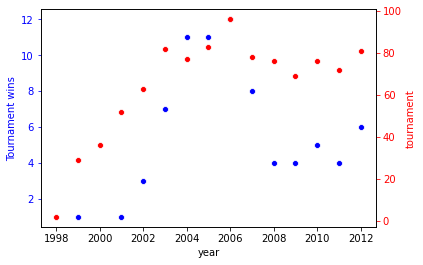

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
df1 = df.loc[(df.winner == 'Roger Federer') & (df['tournament round'] == 'F')].groupby(by='year').count().tournament
df2 = df.loc[(df.winner == 'Roger Federer')].groupby(by='year').count().tournament
ax = sns.scatterplot(x=df1.index, y=df1,legend=False,color='blue')
ax.set_ylabel('Tournament wins',color='blue')
ax.tick_params(axis='y', colors='blue')
ax2 = ax.twinx()
ax2.set_ylabel('Match wins',color='red')
ax2.tick_params(axis='y', colors='red')
sns.scatterplot(x=df2.index, y=df2,label='match wins', color='red',ax=ax2,legend=False)

In [46]:
# Answer: Federer is winning a consistent number
#         of matches per year since 2003 but is
#         winning less tournaments since the 2004/
#         2005 peak

# 5.3 Total money won

In the data, you'll find the `tournament round`, one value of which, `F` indicates the final.

Assuming Federer wins the money in the `tournament prize money` if he wins a final in a tournament, how much money has Federer made in tournaments in this dataset?

In [47]:
df = pd.read_csv('data/tennis.csv')
df['tournament prize money'] = df['tournament prize money'].replace('[a-zA-Z\$,]', '', regex=True).replace('',0).astype(float)
df['tournament prize money'].loc[(df['tournament round'] == 'F') & (df['winner'] == 'Roger Federer')].sum()
# Federer would have won an astronomical amount of money

44934964.0